<h1> <center> Project Optimal Investment: <br> <b>Analyzing Stock Market Trends for Informed Decision-Making </b> <br> <code> (Group 5) </code> </center> </h1>


<center> <img src="https://miro.medium.com/v2/resize:fit:596/1*QinDfRawRskupf4mU5bYSA.png" alt="Paris" class="center"> </center>



This project focuses on utilizing Python code to analyze stock market data using two key techniques: **Principal Component Analysis (PCA) and K-means clustering**. The objective is to identify patterns within the data and make informed decisions on the optimal time periods for investment.

By combining the results of PCA and K-means clustering, we gain a comprehensive understanding of the stock market's dynamics. This information guides us in making informed decisions on when to invest and when to stay away from the market.

Ultimately, this project aims to provide investors with a data-driven approach to optimize their investment strategies. By analyzing stock market trends, identifying patterns, and determining favorable time periods, investors can increase their chances of making successful and profitable investment decisions.

## **TABLE OF CONTENTS**

[0. Problem description](#scrollTo=V_PAD5LLwzbW)

[1. Import libraries](#scrollTo=wnbjYzZyyzxw)

[2. Explore data analysis (EDA)](#scrollTo=qADQjx5Sy7Dy)

>[2.1. Read pickle file](#scrollTo=64afEQV9zR7j)

>[2.2. So what is the last column about?](#scrollTo=RBPfeQB_KnvR)

>[2.3. Convert timezone and resample time series data](#scrollTo=8PbOB5m4KBdX)

>[2.4. Relationship between stock price and stock volume (stock's liquidity)](#scrollTo=_XX_Lgu3xFZB)

>>[2.4.1. The bid, ask price vs volume (1st priority)](#scrollTo=Eu210puyyfM3)

>>[2.4.2. The price and total volume (1st priority)](#scrollTo=AYkiDWdNyPvF)

[3. Feature Selection](#scrollTo=V0O5VL1I4Ffi)

[4. Feature Scaling](#scrollTo=qQ6bmk9hRXxc)

[5. PCA (Principal component analysis)](#scrollTo=Rj4MFAyk7ExZ)

[5.1. Subtract the mean of each variable](#scrollTo=Z4fLZMsmgCa3)

>[5.2. Calculate the covariance matrix](#scrollTo=hgWcl12fx7OA)

>[5.3. Compute the eigenvalues and eigenvectors and sort eigenvalues in descending order](#scrollTo=KQ6RuJfNx7OB)

>[5.4. Choose the principal components](#scrollTo=juT9w_DQx7OB)

>[5.5. Apply to our data](#scrollTo=1k9Cfcqew-Xc)

[6. K-Means Clustering](#scrollTo=NWB8v3SexKU7)

>>[6.1. K-Means Algorithm](#scrollTo=5PKqYEFI22gw)

>>[6.2. Visualize each cluters follow target](#scrollTo=2qvR4Mwq2-ow)

>>[6.3. Predict data trend](#scrollTo=dz0y_f-F3Tg9)

>>>[6.3.1. Pattern for  selling stock:](#scrollTo=pmjHhvq4sH-t)

>>>[6.3.2. Pattern for  buying stock:](#scrollTo=daR71yYAvCQ2)

>>[6.4. Decision-Making](#scrollTo=dh7ulJ_Gw_GQ)

[7. Conclusion](#scrollTo=hQjRyR4o3ai2)

[8. References](#scrollTo=9GApYQLx9s63)

[BẢNG PHÂN CÔNG](#scrollTo=Z15AOe_33vDQ)

## **0. Problem description**
<ul>
<li> About the dataset: </li> <ul>
<li>  The dataset contains stock price data for 30 companies listed on the Vietnam Stock Exchange. </li>
<li>  The data is presented in the form of a time series, with data points recorded every 10 seconds during trading hours.  </li>
</ul>
<li> Our goals:
<ul> <li>   Analyzing Stock Market Trends and Identifying Optimal Investment Timeframes.     </li>
<li> Uncover patterns in investment timeframes that align with positive market news, sideways movements, and periods to avoid investing (e.g: for stock inventory pushing). </li> </ul>
<li> Steps & Algorithms:
<ul> <li>
Time Series Clustering: grouping time series that are similar in shape or pattern using KMeans.
 </li>
<li>   
Time Series Linear Analysis: reducing the dimensionality of the data using PCA.</li> </ul>



## **1. Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as pld
import seaborn as sns
sns.set()

## **2. Explore data analysis (EDA)**

### **2.1. Read pickle file**

In [ ]:
pickle = pd.read_pickle('https://github.com/thangbuiq/stored-files/raw/main/df_merged.pkl', compression = "infer")
pickle

[                           mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  \
 _time                                                                 
 2023-04-19 02:15:30+00:00     24.750000          78.7          44.6   
 2023-04-19 02:15:40+00:00     24.750000          78.7          44.6   
 2023-04-19 02:15:50+00:00     24.750000          78.7          44.6   
 2023-04-19 02:16:00+00:00     24.750000          78.7          44.6   
 2023-04-19 02:16:10+00:00     24.750000          78.7          44.6   
 ...                                 ...           ...           ...   
 2023-04-19 07:29:40+00:00     24.400000          78.7          44.4   
 2023-04-19 07:29:50+00:00     24.441667          78.7          44.4   
 2023-04-19 07:30:00+00:00     24.433333          78.7          44.4   
 2023-04-19 07:30:10+00:00     24.450000          78.7          44.4   
 2023-04-19 07:30:20+00:00     24.416667          78.7          44.4   
 
                            mua_gia_1BVH  mua_gia_1CTG  mua_gi

In [ ]:
type(pickle)

list

In [ ]:
len(pickle)

23

* From the pickle, we can see the pickle is a list that contains 23 data frames, each data frame includes sufficient information on one day.
* First, we will `reset_index` to make `_time` is column for processing. Then, we create a full data frame containing 23 data frames over a 23-day period in the pickle.

In [ ]:
disable_groupby = lambda df, groupby_elements: df.reset_index(level = groupby_elements)

for x in range(len(pickle)):
    exec(f'df{x} = pickle[{x}]')
    exec(f'df{x} = disable_groupby(df{x}, ["_time"])')

full_df = pd.DataFrame()
for i in range(22,-1,-1):
    exec(f'full_df = pd.concat([full_df, df{i}])')

In [ ]:
full_df.head()

,_time,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
0,2023-03-20 02:17:00+00:00,24.200000,81.1,45.9,49.80,28.733333,79.0,104.00,14.800000,18.15,...,0.000000,3000.000000,400.000000,10.0,1720.0,360.0,0.0,1130.0,120.0,1980.0
1,2023-03-20 02:17:10+00:00,24.200000,81.1,45.9,49.80,28.750000,79.0,104.00,14.800000,18.15,...,1975.000000,3026.666667,0.000000,10.0,660.0,660.0,0.0,1030.0,120.0,0.0
2,2023-03-20 02:17:20+00:00,24.200000,81.1,45.9,49.55,28.750000,79.0,104.00,14.800000,18.15,...,0.000000,180.000000,0.000000,10.0,700.0,800.0,0.0,1030.0,320.0,0.0
3,2023-03-20 02:17:30+00:00,24.200000,81.1,45.9,49.55,28.750000,79.0,104.00,14.800000,18.15,...,0.000000,310.000000,400.000000,0.0,1070.0,40.0,0.0,1000.0,2830.0,2980.0
4,2023-03-20 02:17:40+00:00,24.200000,81.1,45.8,49.55,28.700000,78.6,104.00,14.800000,18.15,...,1130.000000,3370.000000,0.000000,50.0,2820.0,40.0,0.0,45.0,2830.0,3010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2023-04-19 07:29:40+00:00,24.400000,78.7,44.4,46.25,28.750000,79.3,95.40,15.050000,19.10,...,0.000000,0.000000,1286.666667,310.0,0.0,0.0,100.0,0.0,12510.0,0.0
1340,2023-04-19 07:29:50+00:00,24.441667,78.7,44.4,46.25,28.750000,79.3,95.40,15.050000,19.10,...,0.000000,703.333333,0.000000,0.0,6200.0,0.0,0.0,450.0,12510.0,480.0
1341,2023-04-19 07:30:00+00:00,24.433333,78.7,44.4,46.25,28.750000,79.3,95.60,15.050000,19.10,...,6543.333333,2165.000000,0.000000,0.0,6220.0,0.0,0.0,0.0,10300.0,0.0
1342,2023-04-19 07:30:10+00:00,24.450000,78.7,44.4,46.25,28.750000,79.3,95.55,15.091667,19.10,...,6310.000000,770.000000,0.000000,0.0,4740.0,1510.0,0.0,0.0,12530.0,0.0


* From the results, we will print the range of 23 days.

In [ ]:
timesr = list(full_df['_time'].values)
onlydate = set([str(pd.to_datetime(x).date()) for x in timesr])
onlydate

{'2023-03-20',
 '2023-03-21',
 '2023-03-22',
 '2023-03-23',
 '2023-03-24',
 '2023-03-27',
 '2023-03-28',
 '2023-03-29',
 '2023-03-30',
 '2023-03-31',
 '2023-04-03',
 '2023-04-04',
 '2023-04-05',
 '2023-04-06',
 '2023-04-07',
 '2023-04-10',
 '2023-04-11',
 '2023-04-12',
 '2023-04-13',
 '2023-04-14',
 '2023-04-17',
 '2023-04-18',
 '2023-04-19'}

> The data spans 23 days from `20/3` to `19/4` but we don't have data on `25-26/3`, `1-2/4` and `15-16/4`.

* Next, we'll explore the feature that every column has.

In [ ]:
[x for x in full_df.columns.to_list() if 'ACB' in x]

['mua_gia_1ACB',
 'ban_gia_1ACB',
 'mua_kl_1ACB',
 'ban_kl_1ACB',
 'mua_kl_2ACB',
 'ban_kl_2ACB']

> Beginning from columns with attributes related to `ACB` as example, we can see 6 atrributes: `mua/ban_gia_1`, `mua/ban_kl_1` and `mua/ban_kl_2`.

In [ ]:
full_df.shape

(30538, 182)

> On the other hand, we can see that `"full_df"` contains 182 columns. Excluding the `"_time"` column, we can predict the dataset includes 30 features, each of which has 6 attributes.

### **2.2. So what is the last column about?**

In [ ]:
([x for x in full_df.columns.to_list() if ('1' not in x) and ('2' not in x) ])

['_time', 'Gia KL']

* `"Gia KL"` is matched price based on in order of priority.
* For the seller, `ban_gia_1/kl_1` is the lowest selling price and corresponding amount. If it doesn't match, the seller will wait for the buyer to place a higher order to match.
* For the buyer, `mua_gia_1/kl_1` is the highest buying price and corresponding amount. If it doesn't match, the buyer will wait for the seller to place a lower order to match.
* Basically, `ban/mua_gia/kl_1` will take priority over `mua/ban_kl_2`.

### **2.3. Convert timezone and resample time series data**

As we can observe, the time-series dataset captures data every 10 seconds, and the feature values do not change significantly within such a short interval of time. To address this, we propose resampling the data to capture data at **5-minute** intervals. This approach will not only reduce the size of the dataframe but also eliminate unnecessary observations that scarcely contribute to the analysis.

In [ ]:
def resample_timeseries(df: pd.DataFrame, time_interval: str = '5min') -> pd.DataFrame:
    df = df.resample(time_interval).first()
    return df.dropna().reset_index() #tDrop time intervals that the original data doesn't have
full_df = resample_timeseries(full_df.set_index("_time"), '5min')
full_df.head()

,_time,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
0,2023-03-20 02:15:00+00:00,24.200000,81.1,45.90,49.800000,28.733333,79.0,104.0,14.80,18.150000,...,0.000000,3000.0,400.0,10.0,1720.0,360.0,0.0,1130.0,120.000000,1980.0
1,2023-03-20 02:20:00+00:00,24.200000,81.1,45.85,49.550000,28.700000,78.6,103.7,14.80,18.016667,...,0.000000,6790.0,0.0,140.0,1420.0,110.0,0.0,0.0,3220.000000,210.0
2,2023-03-20 02:25:00+00:00,24.200000,81.2,45.85,49.550000,28.700000,78.7,103.5,14.70,18.000000,...,1060.000000,4030.0,470.0,0.0,1755.0,0.0,0.0,0.0,6580.000000,0.0
3,2023-03-20 02:30:00+00:00,24.250000,81.1,45.85,49.850000,28.800000,78.7,103.6,14.75,18.050000,...,2100.000000,0.0,1350.0,1010.0,4840.0,0.0,160.0,0.0,2050.000000,0.0
4,2023-03-20 02:35:00+00:00,24.200000,81.0,45.85,49.700000,28.750000,78.6,103.5,14.75,18.050000,...,0.000000,790.0,0.0,420.0,0.0,0.0,170.0,570.0,2050.000000,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2023-04-19 07:10:00+00:00,24.500000,79.3,44.50,46.350000,28.750000,79.4,95.6,15.40,19.150000,...,14010.000000,0.0,0.0,0.0,14320.0,2200.0,0.0,5530.0,6340.000000,880.0
1067,2023-04-19 07:15:00+00:00,24.450000,78.7,44.40,46.200000,28.700000,79.4,95.5,15.35,19.150000,...,0.000000,4140.0,3280.0,0.0,12610.0,0.0,0.0,5620.0,20230.000000,3415.0
1068,2023-04-19 07:20:00+00:00,24.450000,78.7,44.40,46.300000,28.700000,79.4,95.6,15.35,19.150000,...,0.000000,1700.0,3140.0,1220.0,11690.0,0.0,0.0,0.0,10366.666667,0.0
1069,2023-04-19 07:25:00+00:00,24.450000,78.9,44.45,46.266667,28.650000,79.3,95.4,15.25,19.150000,...,0.000000,1710.0,0.0,0.0,7980.0,0.0,0.0,2210.0,21897.500000,360.0



The dataset's index is in the data type of Timestamp. However, upon closer inspection, it becomes evident that the index is set to the incorrect timezone (UTC+00), whereas we are in the Vietnamese time zone (**GMT+7**). To rectify this issue, we need to adjust the timezone of the index to **Asia/Ho_Chi_Minh.**

In [ ]:
def convert_timezone(df: pd.DataFrame, time_zone: str) -> pd.DataFrame:
    df.index = df.index.tz_convert(time_zone)
    return df.reset_index()
full_df = convert_timezone(full_df.set_index("_time"), 'Asia/Ho_Chi_Minh')
full_df.head()

,_time,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
0,2023-03-20 09:15:00+07:00,24.200000,81.1,45.90,49.800000,28.733333,79.0,104.0,14.80,18.150000,...,0.000000,3000.0,400.0,10.0,1720.0,360.0,0.0,1130.0,120.000000,1980.0
1,2023-03-20 09:20:00+07:00,24.200000,81.1,45.85,49.550000,28.700000,78.6,103.7,14.80,18.016667,...,0.000000,6790.0,0.0,140.0,1420.0,110.0,0.0,0.0,3220.000000,210.0
2,2023-03-20 09:25:00+07:00,24.200000,81.2,45.85,49.550000,28.700000,78.7,103.5,14.70,18.000000,...,1060.000000,4030.0,470.0,0.0,1755.0,0.0,0.0,0.0,6580.000000,0.0
3,2023-03-20 09:30:00+07:00,24.250000,81.1,45.85,49.850000,28.800000,78.7,103.6,14.75,18.050000,...,2100.000000,0.0,1350.0,1010.0,4840.0,0.0,160.0,0.0,2050.000000,0.0
4,2023-03-20 09:35:00+07:00,24.200000,81.0,45.85,49.700000,28.750000,78.6,103.5,14.75,18.050000,...,0.000000,790.0,0.0,420.0,0.0,0.0,170.0,570.0,2050.000000,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2023-04-19 14:10:00+07:00,24.500000,79.3,44.50,46.350000,28.750000,79.4,95.6,15.40,19.150000,...,14010.000000,0.0,0.0,0.0,14320.0,2200.0,0.0,5530.0,6340.000000,880.0
1067,2023-04-19 14:15:00+07:00,24.450000,78.7,44.40,46.200000,28.700000,79.4,95.5,15.35,19.150000,...,0.000000,4140.0,3280.0,0.0,12610.0,0.0,0.0,5620.0,20230.000000,3415.0
1068,2023-04-19 14:20:00+07:00,24.450000,78.7,44.40,46.300000,28.700000,79.4,95.6,15.35,19.150000,...,0.000000,1700.0,3140.0,1220.0,11690.0,0.0,0.0,0.0,10366.666667,0.0
1069,2023-04-19 14:25:00+07:00,24.450000,78.9,44.45,46.266667,28.650000,79.3,95.4,15.25,19.150000,...,0.000000,1710.0,0.0,0.0,7980.0,0.0,0.0,2210.0,21897.500000,360.0


### **2.4. Relationship between stock price and stock volume (stock's liquidity)**

The bar with line (or bar with candlestick) chart that shows the relationship between stock price and stock volume is called a **Liquidity** Chart. A stock's liquidity generally refers to how rapidly shares of a stock can be bought or sold without substantially impacting the stock price. Stocks with low liquidity may be difficult to sell and may cause you to incur a bigger loss if you cannot sell the shares when you want to.
> For example:
![](https://static.seekingalpha.com/uploads/2022/5/9/55692945-16521254755719802_origin.png)

 * Because the dataset has `ban/mua_kl_2` attributes but does not mention about `gia_ban/mua_2` attributes. Therefore, we will not use them.
 * To see how stock price and stock volume related to each other, we progress with the following steps.

#### 2.4.1. The bid, ask price vs volume (1st priority)

- Handle missing value by replacing 0 with mean of value.

In [ ]:
val_df = full_df.copy()
for i in range(1, len(full_df.columns)):
    val = val_df.iloc[:,i].mean()
    val_df.iloc[:,i] = val_df.iloc[:,i].replace(0, val)
val_df.head()

,_time,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
0,2023-03-20,24.200000,81.1,45.90,49.800000,28.733333,79.0,104.0,14.80,18.150000,...,5669.057032,3000.000000,400.00000,10.000000,1720.000000,360.000000,41.513383,1130.00000,120.000000,1980.000000
1,2023-03-20,24.200000,81.1,45.85,49.550000,28.700000,78.6,103.7,14.80,18.016667,...,5669.057032,6790.000000,377.03766,140.000000,1420.000000,110.000000,41.513383,1022.87186,3220.000000,210.000000
2,2023-03-20,24.200000,81.2,45.85,49.550000,28.700000,78.7,103.5,14.70,18.000000,...,1060.000000,4030.000000,470.00000,1217.887681,1755.000000,1243.024196,41.513383,1022.87186,6580.000000,1237.891223
3,2023-03-20,24.250000,81.1,45.85,49.850000,28.800000,78.7,103.6,14.75,18.050000,...,2100.000000,4248.560609,1350.00000,1010.000000,4840.000000,1243.024196,160.000000,1022.87186,2050.000000,1237.891223
4,2023-03-20,24.200000,81.0,45.85,49.700000,28.750000,78.6,103.5,14.75,18.050000,...,5669.057032,790.000000,377.03766,420.000000,5269.980722,1243.024196,170.000000,570.00000,2050.000000,320.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2023-04-19,24.500000,79.3,44.50,46.350000,28.750000,79.4,95.6,15.40,19.150000,...,14010.000000,4248.560609,377.03766,1217.887681,14320.000000,2200.000000,41.513383,5530.00000,6340.000000,880.000000
1067,2023-04-19,24.450000,78.7,44.40,46.200000,28.700000,79.4,95.5,15.35,19.150000,...,5669.057032,4140.000000,3280.00000,1217.887681,12610.000000,1243.024196,41.513383,5620.00000,20230.000000,3415.000000
1068,2023-04-19,24.450000,78.7,44.40,46.300000,28.700000,79.4,95.6,15.35,19.150000,...,5669.057032,1700.000000,3140.00000,1220.000000,11690.000000,1243.024196,41.513383,1022.87186,10366.666667,1237.891223
1069,2023-04-19,24.450000,78.9,44.45,46.266667,28.650000,79.3,95.4,15.25,19.150000,...,5669.057032,1710.000000,377.03766,1217.887681,7980.000000,1243.024196,41.513383,2210.00000,21897.500000,360.000000


- Since we have to make conclusion from stock data on 23 days, 5 minutes gap will make the data excessive for visualizing. Instead, we will resample the data to capture data at **1-day** intervals.

In [ ]:
val_df['_time'] = pd.to_datetime(val_df['_time']).dt.date
val_df = val_df.groupby('_time').mean()
val_df.head()

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-03-20,24.104433,81.031915,45.618085,49.397872,28.522163,78.243617,103.310284,14.569415,17.874894,20.301976,...,4404.970146,5004.539009,405.918456,1225.406182,5458.712740,969.456075,57.110111,1006.391746,15084.736659,1174.098317
2023-03-21,24.067021,80.597872,45.114894,48.954255,28.210461,77.686170,103.072340,14.337234,17.668085,20.076565,...,6737.091739,3661.686011,544.862401,1296.259636,5223.780381,1117.036721,68.435213,1370.209523,50286.016223,879.323738
2023-03-22,24.210360,80.878829,45.903716,48.853378,28.468581,77.978041,102.941892,14.527215,17.598649,20.380068,...,6141.795292,3979.897627,582.322743,1316.310023,4776.610159,1156.314300,58.483462,1114.102608,39982.288824,2166.977427
2023-03-23,24.137943,80.628723,45.617908,48.614894,28.320124,77.822872,102.377660,14.381915,17.576064,20.184043,...,4871.098831,3695.218893,445.565790,956.604841,4864.848312,1442.806282,107.509966,1185.615418,30462.197652,1274.908844
2023-03-24,24.622695,81.298936,45.838298,48.513298,28.631649,78.375887,102.800000,14.832979,17.958511,20.398936,...,6535.388209,4641.884270,367.289654,1913.382670,8656.216431,1633.864963,67.925714,1075.920935,31616.902091,2480.356100


* Define a function for filtering an attribute and calculate mean value according to date (`ban_kl_1` for example)

In [ ]:
def select_data(df: pd.DataFrame, col: list[str]) -> pd.DataFrame:
    selected_data = df.reset_index().set_index("_time")
    for x in selected_data.columns.to_list():
        if True not in [(i in x) for i in col]:
            selected_data = selected_data.drop(columns=[x])
    return selected_data

def new_feature_data(feature: str):
    feature_data = select_data(val_df, [feature])

    # remove outliers
    removed_outliers_data = feature_data.T
    for col in removed_outliers_data.columns:
        Q1 = removed_outliers_data[col].quantile(0.25)
        Q3 = removed_outliers_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        removed_outliers_data = removed_outliers_data[removed_outliers_data[col] >= lower]
        removed_outliers_data = removed_outliers_data[removed_outliers_data[col] <= upper]

    feature_data = removed_outliers_data.T

    # calculate mean of prices from all companies according to time index
    feature_data[f'mean_{feature}'] = feature_data.iloc[:, 0:(len(feature_data.columns))].mean(axis=1)

    # remove every columns except for the newly created one
    feature_data = feature_data.drop(feature_data.iloc[:, 0:(len(feature_data.columns) - 1)], axis=1)

    return feature_data

* Filtering mean of two attributes: `mua_gia_1` and `ban_gia_1`

In [ ]:
mean_buy_price = new_feature_data('mua_gia_1')
mean_sell_price = new_feature_data('ban_gia_1')

- Create `plot_df` with ACB attributes to evaluate the liquidity of this company stock.

In [ ]:
plot_df = select_data(val_df, ['mua_kl_1ACB', 'ban_kl_1ACB', ])
plot_df.head()

,mua_kl_1ACB,ban_kl_1ACB
_time,,
2023-03-20,5147.607278,2916.554735
2023-03-21,3366.489296,2455.398344
2023-03-22,4396.222700,2794.839395
2023-03-23,4702.761716,3507.689260
2023-03-24,4529.901273,3774.484645


- Draw chart of the stock liquidity of ACB. The chart includes line plot of the mean stock price and bar plot of the stock volume.

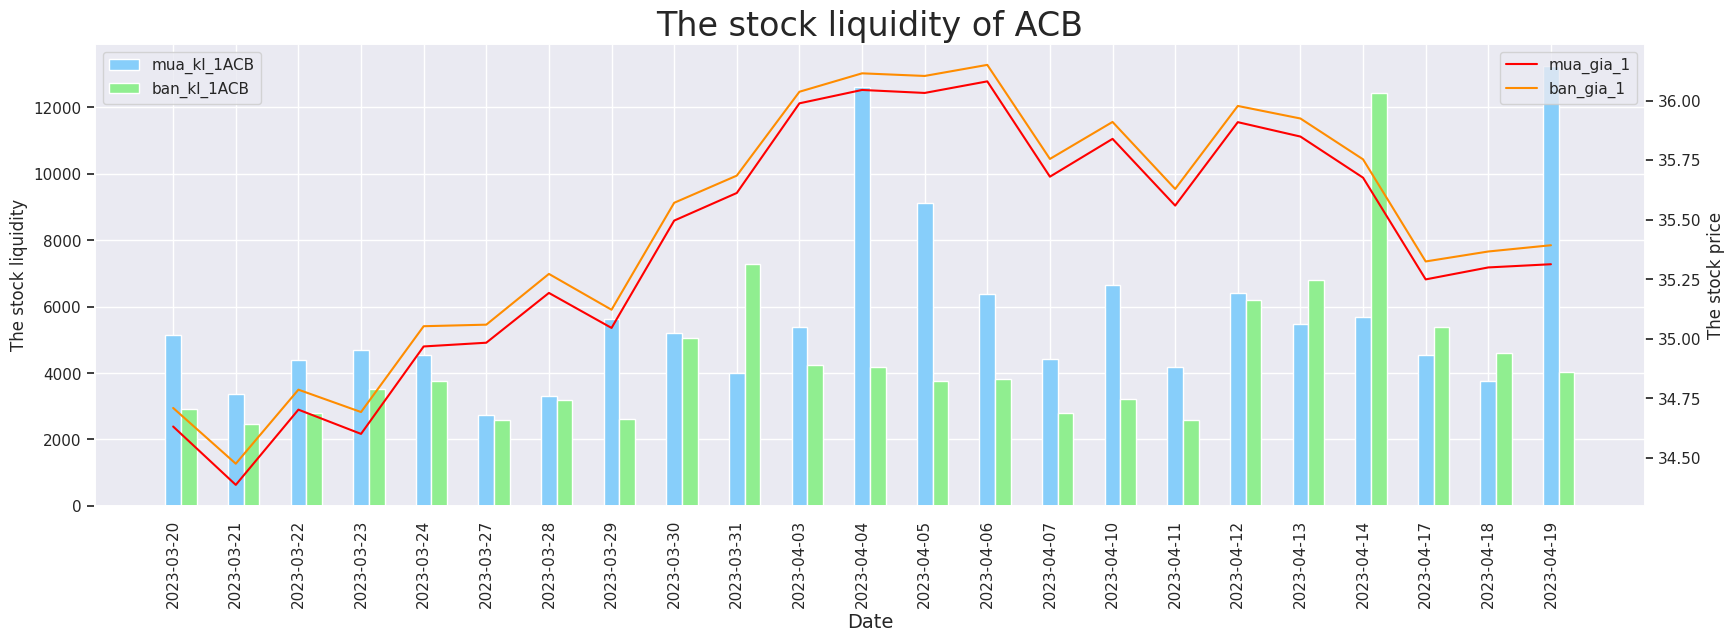

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,6))
r = np.arange(len(plot_df))
width = 0.25
ax.bar(r, plot_df['mua_kl_1ACB'], color ='lightskyblue', width = width)
ax.bar(r+width, plot_df['ban_kl_1ACB'], color ='lightgreen', width = width)
r = np.arange(len(val_df))
plt.xticks(r,plot_df.index, rotation = 90)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('The stock liquidity')
plt.legend(['mua_kl_1ACB','ban_kl_1ACB'], loc = 2 )
ax1 =ax.twinx()
ax1.plot(r,mean_buy_price['mean_mua_gia_1'], color ='red')
ax1.plot(r,mean_sell_price['mean_ban_gia_1'], color ='darkorange')
ax1.grid(False)
plt.legend(['mua_gia_1', 'ban_gia_1'], loc = 1)
plt.ylabel('The stock price')
plt.title("The stock liquidity of ACB", fontsize=24)
plt.show()

Describe chart:
- The chart illustrates the ACB's stock volume and the stock price from `20-03-2023` to `19-04-2023`.
- The line of the stock price rises from `21/03/2023`to`03/04/2023` which indicates positive market. In this case, we should buy when both the volume and the price increase together such as within `30/03` - `03/04/2023`.
- The line of the stock price declines from `03/04/2023` to `19/04/2023`. This is a difficult period in instance`07/04`-`14/04`, the stock price descreases but the volume increases which indicate the deteriorate market and prepare changing trend.

#### 2.4.2. The price and total volume (1st priority)

- To have a further understanding on the relationship between stock price and stock volume, we're going to plot the mean stock's liquidity of all companies available in the dataset.
- First, filtering mean of the two remaining attributes: `ban_kl_1` and `mua_kl_1`

In [ ]:
mean_sell_volume = new_feature_data('ban_kl_1')
mean_buy_volume = new_feature_data('mua_kl_1')

- Since we are going to see the trend of these attributes, we will times the `mean_sell_volume` with $-1$ to make the barplot of this attribute downward as shown bellow

In [ ]:
mean_sell_volume['mean_ban_kl_1'] = mean_sell_volume['mean_ban_kl_1'].multiply(-1)

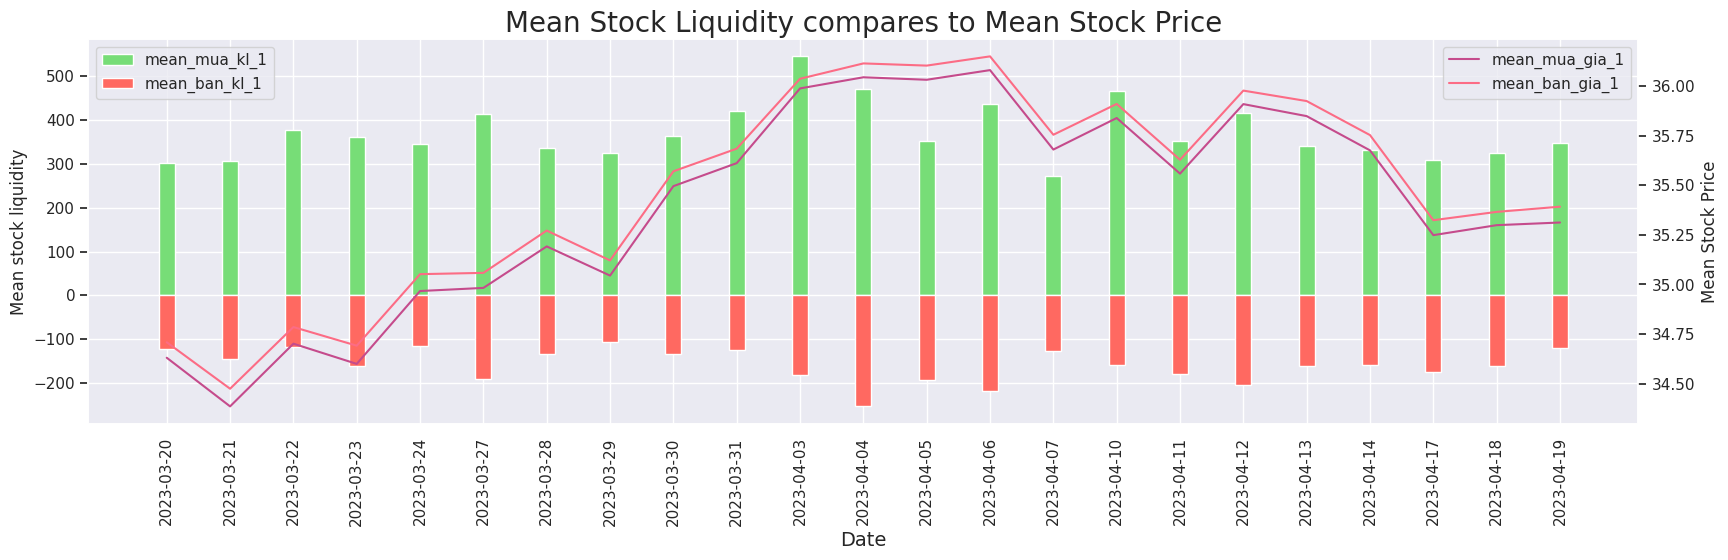

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,5))
r = np.arange(len(val_df))
width = 0.25
ax.bar(r, mean_buy_volume['mean_mua_kl_1'], color='#77dd77', width=width)
ax.bar(r, mean_sell_volume['mean_ban_kl_1'], color='#ff6961', width=width)
r = np.arange(len(mean_buy_price))
plt.xticks(r, val_df.index, rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean stock liquidity')
plt.legend(['mean_mua_kl_1', 'mean_ban_kl_1'], loc=2)
ax1 = ax.twinx()
ax1.plot(r, mean_buy_price['mean_mua_gia_1'], color='#c54b8c')
ax1.plot(r, mean_sell_price['mean_ban_gia_1'], color='#fc6c85')
ax1.grid(False)
plt.legend(['mean_mua_gia_1', 'mean_ban_gia_1'], loc=1)
plt.ylabel('Mean Stock Price')
plt.title('Mean Stock Liquidity compares to Mean Stock Price', fontsize=20, pad=5)
plt.show()

Describe chart:
- The chart illustrates the mean stock volume and mean stock price from `20-03-2023` to `19-04-2023`.
- Since the lines represent the stock price is used in the previous section, we will not analyze this trend. Instead we are going to see the relationships between the attributes.
- When examining stock volume and stock price trend over a 23-day period, it becomes apparent that there is a correlation between the two. By analyzing the plot between 22-03-2023 and 03-04-2023, it is evident that the mean stock volume increases alongside the mean stock price.  This trend is further evident between `06-04-2023` and `19-04-2023`, where the stock price fluctuates then drops significantly, the stock volume follows a similar pattern.

## **3. Feature Selection**

* Due to the dataset containing an excessive number of columns, we are opting to utilize PCA for dimensional reduction purposes in order to facilitate analysis.
* Before conducting PCA, we will specifically choose the stock price as the variable for time series linear analysis.

In [ ]:
def select_data(df: pd.DataFrame, col: list[str]) -> pd.DataFrame:
    selected_data = df.reset_index().set_index("_time")
    for x in selected_data.columns.to_list():
        if True not in [(i in x) for i in col]:
            selected_data = selected_data.drop(columns=[x])
    return selected_data

> The `select_data` function returns a new data frame that consists of the selected attribute(s), with timestamps as the data frame's index.

In [ ]:
X_sell = select_data(full_df, ['ban_gia_1', 'ban_kl_1'])
N, d = X_sell.shape
print("Num. samples: ", N)
print("Num. features/variables: ", d)

Num. samples:  1071
Num. features/variables:  60


In [ ]:
X_buy = select_data(full_df, ['mua_gia_1', 'mua_kl_1'])
N, d = X_buy.shape
print("Num. samples: ", N)
print("Num. features/variables: ", d)

Num. samples:  1071
Num. features/variables:  60


> * PCA represents the data in a new coordinate system so that the first direction/dimension has the maximum variance $(\mathbb{V}ar)$, with maximum information.
* Hence, our primary focus is to obtain as much information as possible regarding *pair-to-pair* attributes `ban_gia_1 `and `ban_kl_1`; `mua_gia_1` and `mua_kl_1`.

## **4. Feature Scaling**

* The outcome of PCA (Principal Component Analysis) is affected by the normalization of features. When dealing with data that has features with different scales, it is of importance to scale the data beforehand. Since data has larger values may sway the data even with relatively little variability.
* We will use `MinMaxScaler` with a purpose of scaling the data to a range between 0 and 1.
$$
\begin{align}
X' = \frac{X-X_{min}}{X_{max} - X_{min}}
\end{align}
$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalize = lambda data: MinMaxScaler().fit_transform(data)

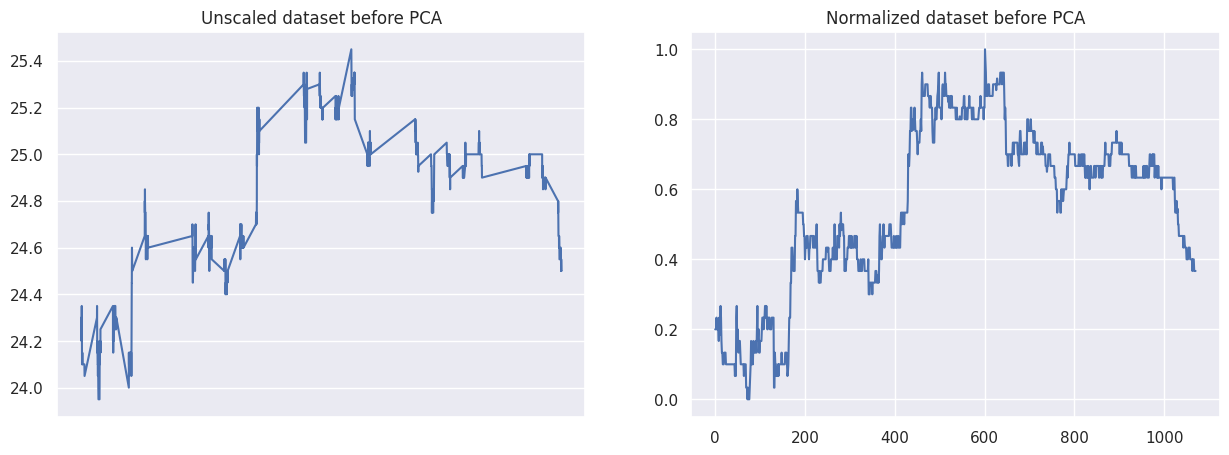

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(X_sell.iloc[:,0])
ax[0].set_title('Unscaled dataset before PCA')
ax[0].set_xticks([])
ax[1].plot(normalize(X_sell).T[0])
ax[1].set_title('Normalized dataset before PCA')
plt.show()

In [ ]:
normal_sell = normalize(X_sell)
normal_buy = normalize(X_buy)

## **5. PCA (Principal component analysis)**

* From the normalized data, we proceed to implement PCA algorithm to find the directions/dimensions in the original data that capture the most variation in the data.
* In this case, we want to find a new data that provides an overview of the features. Since we will use `K-means clustering`, PCA makes result more accurate, efficient, and meaningful.

## **5.1. Subtract the mean of each variable**


5.1.1.   Calculate expectation vector of all data:
$$
\begin{align}
\bar{x} = \frac{1}{N}\sum^{N}_{n=1}x_{n}
\end{align}
$$
5.1.2.   Subtract each data point from the expectation vector of all data:
$$
\begin{align}
\hat{x}_{n} = x_{n} - \bar{x}
\end{align}
$$





In [ ]:
def mean_vector(X):
    return np.mean(X, axis=0)

def xn_hat(X):
    X_meaned = X - mean_vector(X)
    return X_meaned

### **5.2. Calculate the covariance matrix**

Use below covariance and covariance matrix formulas:
\begin{gather}
\text{Cov}(x, y) = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) \\
\boldsymbol{S} = \begin{bmatrix}
\text{Cov}(x_1, x_1) & \text{Cov}(x_1, x_2) & \cdots & \text{Cov}(x_1, x_m) \\
\text{Cov}(x_2, x_1) & \text{Cov}(x_2, x_2) & \cdots & \text{Cov}(x_2, x_m) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(x_m, x_1) & \text{Cov}(x_m, x_2) & \cdots & \text{Cov}(x_m, x_m) \\
\end{bmatrix}
\\\\
\end{gather}
to calculate the $S$ (covariance matrix):
\begin{align}
\boldsymbol{S} = \frac{1}{N}\hat{X}\hat{X}^{T} \\
\end{align}




In [ ]:
def covariance_matrix(X_meaned):
    cov_mat = np.cov(X_meaned, rowvar=False)
    return cov_mat

### **5.3. Compute the eigenvalues and eigenvectors and sort eigenvalues in descending order**

Let $S$ be a square matrix (in our case the `covariance matrix`), $v$ be a vector and $λ$ be a scalar that satisfies $S = \lambda v$, \\
then $\lambda$ is called an eigenvalue represents an eigenvector $v$ of S.

In [ ]:
def compute_eigenvector_subset(cov_mat):
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    # sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    # similarly sort the eigenvectors
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    return sorted_eigenvectors

### **5.4. Choose the principal components**

We choose the first K eigenvectors corresponding to $K$ eigenvalues. $K \leq n_{feature}$ is the number of dimensions of the new feature subspace.

In [ ]:
def choose_principal_components(sorted_eigenvectors, n_components):
    k = n_components
    eigenvector_subset = sorted_eigenvectors[:, 0:k]
    return eigenvector_subset

### **5.5. Apply to our data**

The orginal data can be approximated using the new data:
$$x ≈ U_{k}Z + \bar{x}$$

In [ ]:
def transform(X_meaned, eigenvector_subset):
    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced

class my_PCA:
    def __init__(self, n_components=None, whiten=False):
        self.n_components = n_components
        self.whiten = bool(whiten)
        self.explained_variance_ratio = list([])

    def fit_transform(self, X):
        X_meaned = xn_hat(X)
        cov_mat = covariance_matrix(X_meaned)
        sorted_eigenvectors = compute_eigenvector_subset(cov_mat)
        eigenvector_subset = choose_principal_components(sorted_eigenvectors, self.n_components)
        # Get variance explained by singular values
        n_samples = (X.shape)[0]
        explained_variance_ = (cov_mat**2) / (n_samples - 1)
        total_var = explained_variance_.sum()
        self.explained_variance_ratio = explained_variance_ / total_var
        return transform(X_meaned, eigenvector_subset)

In [ ]:
my_pca1 = my_PCA(n_components=60)
sell_reduced = my_pca1.fit_transform(normal_sell)
principal_df1 = pd.DataFrame(sell_reduced)
principal_df1 = pd.concat([principal_df1 , pd.DataFrame(X_sell.columns)] , axis = 1)

In [ ]:
my_pca2 = my_PCA(n_components=60)
buy_reduced = my_pca2.fit_transform(normal_buy)
principal_df2 = pd.DataFrame(buy_reduced )
principal_df2 = pd.concat([principal_df2 , pd.DataFrame(X_buy.columns)] , axis = 1)

In [ ]:
principal_df1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,0
0,1.273257,-0.038845,-0.758016,0.393555,0.286094,-0.091853,0.106166,-0.139059,-0.029214,0.107001,...,-0.023538,-0.028733,-0.013079,0.044611,-0.076253,-0.020805,-0.015135,-0.044288,-0.021637,ban_gia_1ACB
1,1.336633,-0.107707,-0.656729,0.337881,0.299291,0.027906,0.113046,-0.141974,0.004599,-0.060487,...,-0.030373,0.004152,0.008814,0.002279,-0.050810,-0.020893,0.037149,-0.017316,-0.017889,ban_gia_1BCM
2,1.321400,-0.211491,-0.637127,0.343548,0.283717,-0.057669,0.163370,-0.157194,-0.063847,0.131609,...,-0.013333,0.005746,-0.042317,0.024485,-0.029410,-0.011537,0.028523,-0.000319,0.005394,ban_gia_1BID
3,1.288326,-0.090783,-0.661214,0.338820,0.262076,-0.086314,0.129235,-0.110413,0.086026,0.169671,...,-0.047637,0.008933,0.024569,0.004398,0.018592,-0.007900,-0.035174,-0.001054,0.028606,ban_gia_1BVH
4,1.230680,-0.191415,-0.653984,0.327915,0.248150,-0.110975,0.192672,-0.064882,-0.016357,0.143316,...,-0.026035,0.011927,-0.030992,0.030150,0.000436,-0.042017,-0.006211,-0.029704,0.018632,ban_gia_1CTG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-0.627553,-1.141355,0.486546,0.223890,0.162792,-0.138015,0.098117,-0.110554,0.123445,-0.041167,...,-0.009137,0.038266,-0.044572,-0.005486,0.018537,0.010869,0.036322,-0.009350,0.008564,NaN
1067,-0.558023,-1.192599,0.480221,0.210793,0.145869,-0.185816,0.114282,-0.051567,0.162362,-0.057440,...,-0.018715,0.063950,-0.073862,0.003355,0.029732,-0.013643,0.055688,-0.014489,-0.014500,NaN
1068,-0.538884,-1.194862,0.498461,0.122238,0.241054,-0.092426,0.133171,-0.225956,0.172922,-0.064153,...,-0.004639,0.038221,-0.042353,-0.027495,0.019318,-0.013585,0.042419,-0.007573,0.007321,NaN
1069,-0.486673,-1.235306,0.532908,0.181734,0.230138,-0.144422,0.141334,-0.018906,0.128947,-0.101636,...,-0.013331,0.019104,-0.072795,-0.016370,0.023905,0.005349,0.027109,-0.019651,-0.001249,NaN


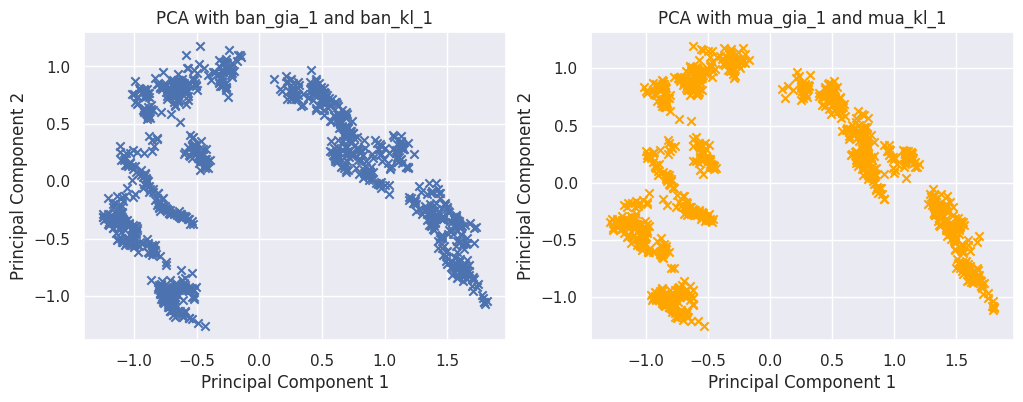

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].scatter(x = principal_df1.iloc[:,0],y = principal_df1.iloc[:,1], marker = 'x')
ax[0].set_title('PCA with ''ban_gia_1'' and ''ban_kl_1''')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].scatter(x = principal_df2.iloc[:,0],y = principal_df2.iloc[:,1], marker = 'x', color='orange')
ax[1].set_title('PCA with ''mua_gia_1'' and ''mua_kl_1''')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
plt.show()

> **Additional comment:** The two figures exhibit a similar pattern, although there are some differences between individual data points. These similarities provide valuable insights:
> * There is a similar trend in buying and selling prices and volumes, from which can indicates similarity in the market structure. As a result, investors can gain insights into the overall market dynamics and potentially identify profitable investment opportunities.
> * Volatility and risk: the stock has relatively stable volatility and lower risk.



## **6. K-Means Clustering**

#### 6.1. K-Means Algorithm

<ul>
<li>After PCA, to observe the distribution of data points into clusters, we proceed with the K-Means algorithm. </li>
<li>K-Means algorithm is implemented in below steps: </li>

1. Choose k clusters you want.
2. Randomly assign a centroid to each of the k clusters.
3. Calculate the distance of all observations to each of the k centroids.
4. Assign observations to the closest centroid.
5. Find the new location of the centroid by taking the mean of the observations in each cluster.
6. Repeat steps 3-5 until the centroids do not change position.
</ul>


In [ ]:
from sklearn.cluster import KMeans
def unique(list1):
    # insert the list to the set
    list1 = list(list1)
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print (f">> Label {x} : {list1.count(x)}")

* Our purpose is to use PCA to get larger and clearer observation of the data. Through this, we use the results of PCA to observe how the cluster target `Gia KL` and what each cluster means in trending stock market.

In [ ]:
X_kl = MinMaxScaler().fit_transform(np.array(full_df['Gia KL']).reshape(-1,1))
X_kl

array([[0.3242115 ],
       [0.29888683],
       [0.29805195],
       ...,
       [0.62847866],
       [0.58928571],
       [0.57050093]])

Assume we have point $a=(a_1,a_2)$; $b=(b_1,b_2)$ and D be the Euclidienan distance between the points then $$D(a,b)=\sqrt{(a_{1}-b_{1})^2+(a_{2}-b_{2})^2}$$
If each cluster centroid is denoted by $c_{i}$, then each data point x is assigned to a cluster based on: $arg(min(c_{i} \in c) D(c_{i}, x)^2)$.
For finding the new centroid from clustered group of points. $$c_{i}=\frac{1}{|S_{i}|}\sum_{x_{i}\in S_{i}}{}{x_{i}}$$

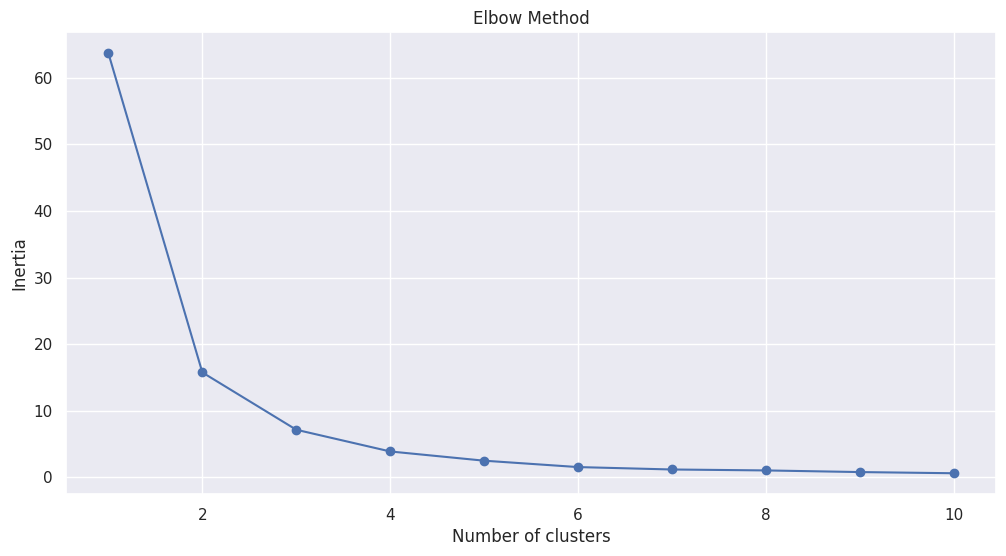

In [ ]:
SSE = []
for cluster in range(1,11,1):
    kmeans = KMeans(n_clusters = cluster, n_init = 'auto', init='k-means++')
    kmeans.fit(X_kl)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11,1), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

> By Elbow Method, we can decide how many k clusters. From the result of visualization, we choose `2` clusters to make K-Means in the following step.

#### 6.2. Visualize each cluters follow target

In [ ]:
kmeans = KMeans(n_clusters=2, n_init = 'auto', init='k-means++').fit(X_kl)
pred_label = kmeans.predict(X_kl)
percentageVariance = np.round(my_pca1.explained_variance_ratio * 100, decimals=1)
labels = ['Comp' + str(n) for n in range(1, len(percentageVariance)+1)]

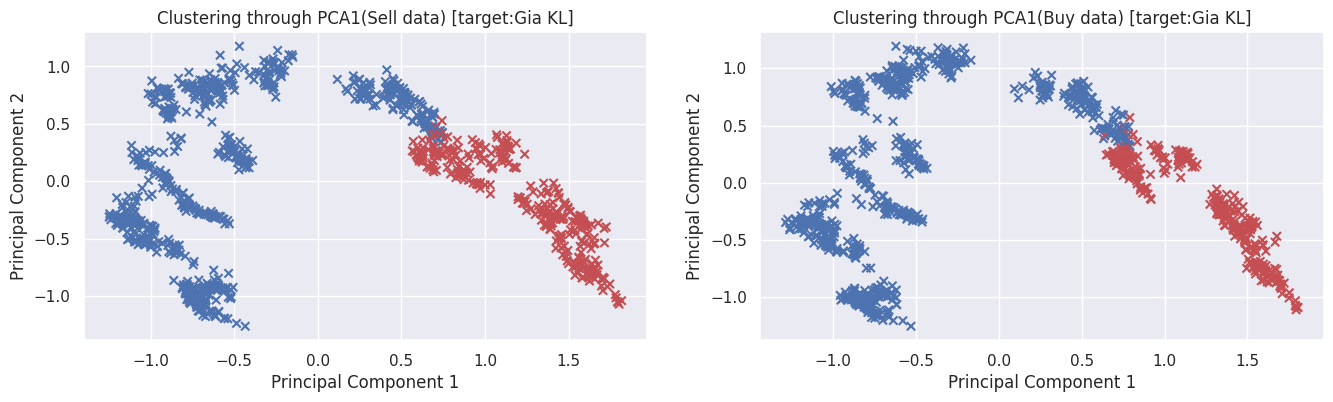

In [ ]:
#create pandas data frame matrix for 2d representation
frame1 = pd.DataFrame(sell_reduced, columns=labels)
frame2 = pd.DataFrame(buy_reduced, columns = labels)
LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 : 'orange', 3 : 'g', 4 : 'purple', 5: 'yellow', 6 : 'pink'}
label_color = [LABEL_COLOR_MAP[l] for l in pred_label]
#First 2 component of PCA analysis result contains most dominant data (out of 4 others in this case)
# Comp1 and Comp2 will be used to create scatter plot
fig, ax = plt.subplots(1,2, figsize=(16, 4))
ax[0].scatter(frame1.Comp1, frame1.Comp2, c = label_color, marker = 'x')
ax[0].set_title('Clustering through PCA1(Sell data) [target:Gia KL]')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].scatter(frame2.Comp1, frame2.Comp2, c = label_color, marker = 'x')
ax[1].set_title('Clustering through PCA1(Buy data) [target:Gia KL]')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
plt.show()

* Next, we will see each cluster's time span?

In [ ]:
# Create a dictionary to store feature names for each cluster
cluster_features = {i: [] for i in range(kmeans.n_clusters)}

# Iterate through each feature and add it to the appropriate list
for feature_idx, feature_name in enumerate(full_df.set_index("_time").index):
    cluster_label = pred_label[feature_idx]
    cluster_features[cluster_label].append(feature_name)

# Print out the results
for cluster_label, feature_list in cluster_features.items():
    print(f"Cluster {cluster_label}: {pd.to_datetime(np.min(list(feature_list))).date()} -  {pd.to_datetime(np.max(list(feature_list))).date()}")

Cluster 0: 2023-03-20 -  2023-03-29
Cluster 1: 2023-03-28 -  2023-04-19


#### 6.3. Predict data trend

* Visualize the normalized sell and buy data based on two clusters, we observe the trend of data in the stock price market.


##### **6.3.1. Pattern for <font color='red'> selling stock</font>:**

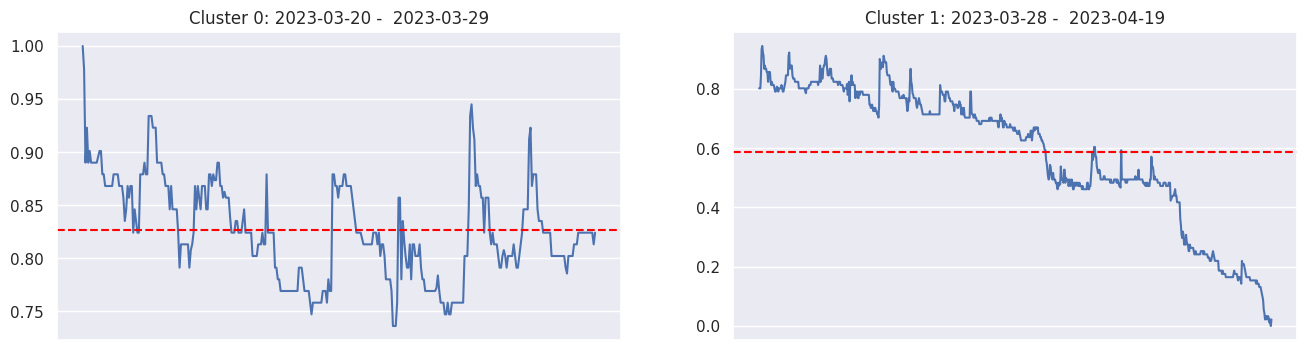

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
for cluster_label, feature_list in cluster_features.items():
    plot_df = pd.DataFrame(normal_sell, index = full_df.set_index("_time").index)[np.min(list(feature_list)):np.max(list(feature_list))]
    ax[cluster_label].plot(plot_df.iloc[:,6].values)
    ax[cluster_label].set_title(f"Cluster {cluster_label}: {pd.to_datetime(np.min(list(feature_list))).date()} -  {pd.to_datetime(np.max(list(feature_list))).date()}")
    ax[cluster_label].axhline(y=np.nanmean(plot_df.iloc[:,6].values), color = 'red', linestyle = '--')
    ax[cluster_label].set_xticks([])
plt.show()

##### **6.3.2. Pattern for <font color='red'> buying stock</font>:**
> Look similar but not the same

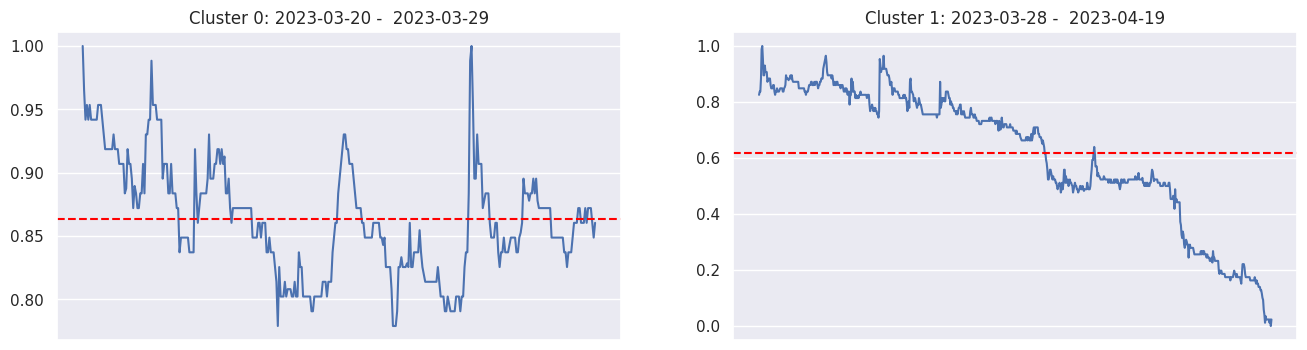

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
for cluster_label, feature_list in cluster_features.items():
    plot_df = pd.DataFrame(normal_buy, index = full_df.set_index("_time").index)[np.min(list(feature_list)):np.max(list(feature_list))]
    ax[cluster_label].plot(plot_df.iloc[:,6].values)
    ax[cluster_label].set_title(f"Cluster {cluster_label}: {pd.to_datetime(np.min(list(feature_list))).date()} -  {pd.to_datetime(np.max(list(feature_list))).date()}")
    ax[cluster_label].axhline(y=np.nanmean(plot_df.iloc[:,6].values), color = 'red', linestyle = '--')
    ax[cluster_label].set_xticks([])
plt.show()

<ul>
<li>The red line depicts the average <code>selling/buying price</code> of the data, allowing us to assess the deviation of the data and identify stock investment trends.</li>
<li>After analysing the above graph, we can conduct two trends in the stock market from each cluster:</li>
<ul>
<li><code>Cluster 0 - </code>$\color{red}{\textbf{SIDEWAY}}$ <code>(20/03/2023-29/03/2023)</code>: the observed trend that new highs and new lows are equal or close to the old ones, is named <code>sideway</code> in the stock market. It indicates a period of relatively stable prices in a particular security or market. </li>
<li><code>Cluster 1 - </code>$\color{red}{\textbf{DOWNTREND}}$ <code> (28/03/2023-19/04/2023)</code>: the observed trend that new high is lower than the old one, is named <code>downtrend</code> in the stock market. This is the time for investors to prioritize selling and continue to wait for the declining price. </li>
</ul>
</ul>

#### 6.4. Decision-Making

It is advisable to avoid investing in the VN30 Index at the end of each quarter (March, June, September, December) because there are regulatory changes that often occur at the beginning of a new quarter, which can lead to a downward trend in the market.

## **7. Conclusion**

* This project purpose is to implement PCA and KMeans algorithms on the given dataset on stock market. By applying the above steps, our goal is to analyze Stock Market Trends, identify optimal investment timeframes, uncover patterns in investment timeframes that align with positive market news, sideways movements, and periods to avoid investing
* As we progress throughout this project, we have visualized the clustering of data points and from that we could made informed investment decisions within a specific time period (on the above section conclusion, the best time for investment is at the end of any quarters in a year). Implementing PCA and K-Means algorithms have proved to be an effecient tool in elevating our comprehension of the stock market and facilitating strategic decision-making.
* Throughout this project, we have successfully met most of our predetermined goals. The results obtained from analyzing the dataset have provided us about stocks trend, effective investing decision within a time period. However, we still encountered major obstacles, particularly in learning about the stock market.
* We solely applied PCA and KMeans algorithms since they were within the project's scopes. However, there are other algorithms that can be utilized with this dataset, such as building models for predicting stock prices. The outcome of these algorithms can enhance the outcome of the project.
* Special thanks to Mr. Minh Man and Mr. Hoang Duc for granting us the opportunity to carry out research on analyzing Stock Market, which has provided us with domain knowledge on Stocks Exchange - knowledge that can be useful for us in the future.

## **8. References**

1.   [Chứng khoán cơ bản - Playlist VN Uptrend](https://www.youtube.com/playlist?list=PLK318jVzY5-mRJsN9dSTy4YlXCAChhLje)
2.   [THANH KHOẢN - Thanh Cong TC](https://www.youtube.com/watch?v=5YiMnuhiDDM&t=1s)
3.   [Github/hduc-le/Introduction-to-data-science/notebooks/[DS2023]_Tutorial_Day03.ipynb](https://github.com/hduc-le/Introduction-to-data-science/blob/main/notebooks/%5BDS2023%5D_Tutorial_Day03.ipynb)
4.   [Github/scikit-learn/sklearn/decomposition/_pca.py](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/decomposition/_pca.py)
5.   [K-means Clustering - Machine Learning Cơ Bản](https://machinelearningcoban.com/2017/01/01/kmeans/)
6.   [Medium - Understanding K-means Clustering in Machine Learning](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)




## **BẢNG PHÂN CÔNG**



| **MSSV**     | **Họ và tên**     | **Nội dung thực hiện**                                                                                                               | **Tỉ lệ % đóng góp** | **Ghi chú** |
|--------------|-------------------|--------------------------------------------------------------------------------------------------------------------------------------|----------------------|-------------|
| **21280038** | Nguyễn Trọng Nhân | Transform và Resample Dữ Liệu, Phân tích Thanh Khoản Cho Trung Bình Dữ Liệu, Phân tích Trending dựa trên kết quả Cluster từ KMeans   | 25%                  |             |
| **21280048** | Bùi Quang Thắng   | Implement PCA from scratch và nghiên cứu ý nghĩa các features để chọn feature có ý nghĩa, chọn PCs để visualize kết quả KMeans       | 25%                  | Nhóm trưởng |
| **21280052** | Lê Võ Bảo Trâm    | Transform và Resample Dữ Liệu, Phân tích Thanh Khoản Cho Từng Công Ty, Phân tích Trending dựa trên kết quả Cluster từ KMeans         | 25%                  |             |
| **21280120** | Nguyễn Thúy Vy    | Sử dụng Scikit\-Learn để dánh label bằng KMeans, scaling data bằng MinMax, đưa ra kết luận cho trending dữ liệu \(decision\-making\) | 25%                  |             |
